# Linear Regression Model


## Import necessary packages


In [1]:
import torch
import random
from typing import List

## Define model & functions


Linear Regression Model:

$$
\hat{y} = w_1 \times x_1 + w_2 \times x_2 + \cdots + w_m \times x_m = X_{(n, m)}\times W_{(m, 1)} + b
$$

In [2]:
def LinearRegressionModel(X: torch.tensor, W: torch.tensor, b: torch.tensor):
    return torch.matmul(X, W) + b

In [3]:
def data_generator(data_num: int, feature_dim: int, W: torch.tensor, b: torch.tensor):
    X = torch.normal(0, 1, (data_num, feature_dim))
    y = torch.matmul(X, W) + b
    y += torch.normal(0, 1, y.shape)
    return X, y

In [4]:
def data_iter(features: torch.tensor, labels: torch.tensor, batch_size: int, shuffle: bool = True):
    data_num = len(features)
    idx = list(range(data_num))
    if shuffle:
        random.shuffle(idx)
    for i in range(0, data_num, batch_size):
        batch_idx = idx[i: min(data_num, i + batch_size)]
        yield features[batch_idx], labels[batch_idx]

Gradient Descent:
$$
w = w - \alpha \times \frac{\partial loss}{\partial w}
$$

In [5]:
def GD(params: List[torch.tensor], batch_size: int, lr=1e-3):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

MSE:
$$
\text{MSE}=\frac12\sum\left( \hat{y} - y \right)^2
$$

In [6]:
def MSE(y_hat: torch.tensor, y: torch.tensor):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [7]:
def init_params(feature_dim):
    return torch.rand((feature_dim, 1), requires_grad=True), torch.rand((1,), requires_grad=True)

## Prepare for training


In [8]:
feature_dim = 5
data_num = 1000

W_gt = torch.randint(-10, 10, (feature_dim, 1)).float()
b_gt = torch.randint(-10, 10, (1,)).float()

batch_size = 4
epochs = 5
shuffle= True
lr = 3e-3

# Model and train data etc. definition
model = LinearRegressionModel
W, b = init_params(feature_dim)

features, labels = data_generator(data_num, feature_dim, W_gt, b_gt)

loss_f = MSE
opt = GD

## Train

In [9]:
for epoch in range(epochs):
    for batch_features, batch_labels in data_iter(features, labels, batch_size, shuffle):
        labels_pred = model(batch_features, W, b)
        loss = loss_f(labels_pred, batch_labels)
        loss.sum().backward()
        opt([W, b], batch_size, lr)
    print('Epoch', epoch + 1, 'loss', loss.sum().detach())

Epoch 1 loss tensor(332.2632)
Epoch 2 loss tensor(16.3614)
Epoch 3 loss tensor(3.8092)
Epoch 4 loss tensor(2.0346)
Epoch 5 loss tensor(1.0479)


## Test

In [10]:
import matplotlib.pyplot as plt

In [11]:
X_test, y_test = data_generator(100, feature_dim, W_gt, b_gt)

In [12]:
with torch.no_grad():
    pred = model(X_test, W, b)

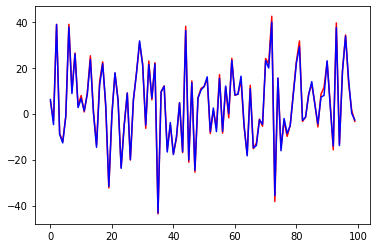

In [13]:
plt.plot(y_test, 'r')
plt.plot(pred, 'b')